# CNN(Convolutional Neural Netork)    

**which is used in image, video frame based data.**


A Convolutional Neural Network (CNN) is a type of deep learning model designed to automatically and adaptively learn spatial hierarchies of features from input data (such as images) by applying convolutional filters, pooling, and non-linear activations.


# The inspiration of CNN is Human Visual Cortex( human brain part)



> Add blockquote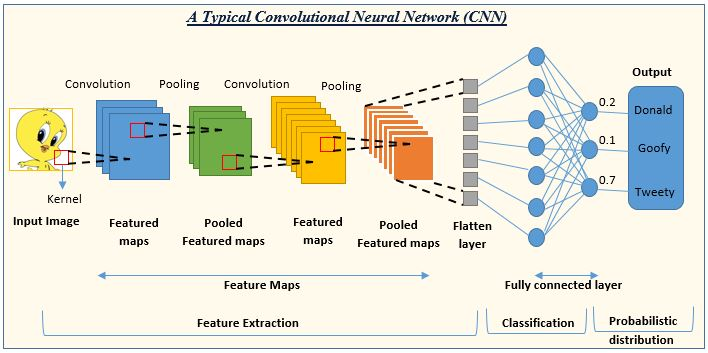



# 3 Layers present in a CNN
1. Convolution Layer

2. Pooling Layer

3. Fully Connected layer(FC layer)

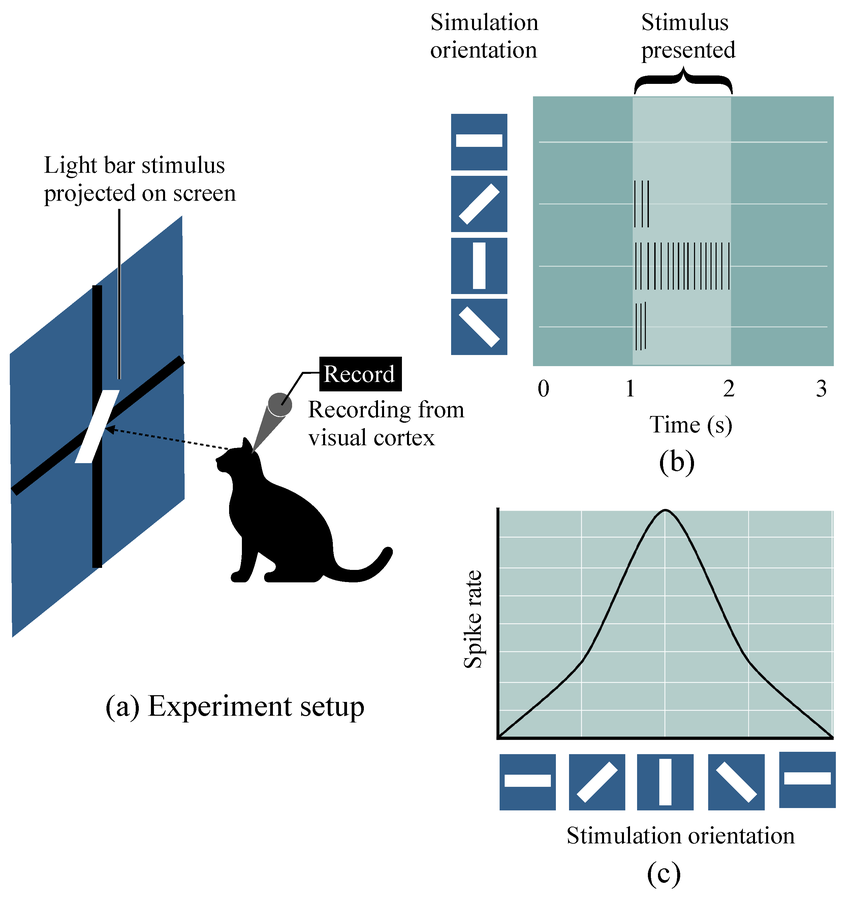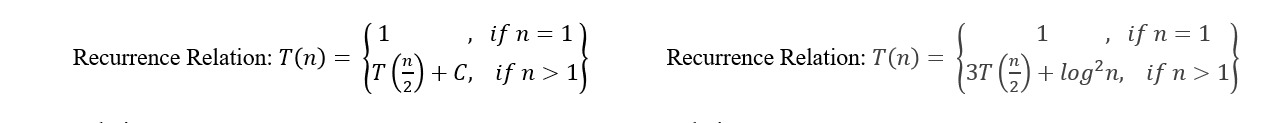

1. Human Brain vs CNN

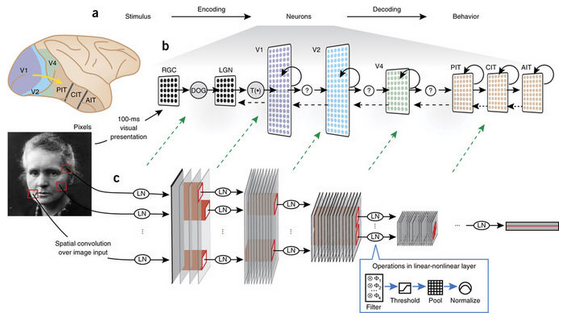

2. Convolution Operation
     
     i. Convolution

     ii. Padding

     iii. Strides

     iv. Filters(kernal)
  
  3. Max Pooling

  4. Flattening

  5. Practical Implementation

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
#downloading the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


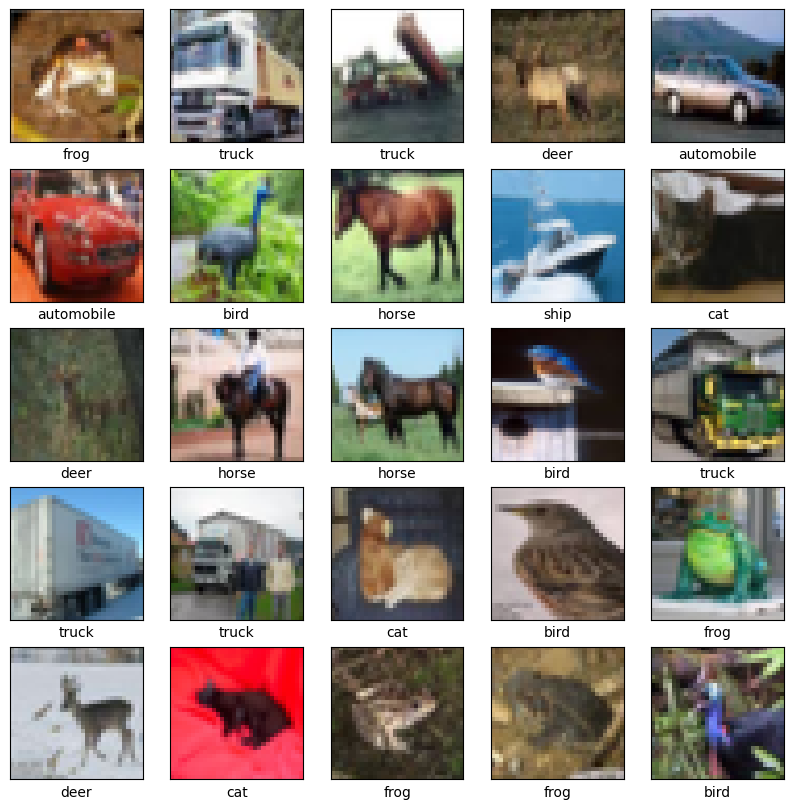

In [ ]:
# ploting 25 images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
#lets create CNN
model = models.Sequential()

#Conv2D(32, (3, 3) means---> 32 filters, 3x3 kernel size in convolution layer

# input_shape=(32, 32, 3) means 32x32 image with 3 channels i.e. RGB
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# adding max pooling layer with 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))
# adding another convolution layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# adding another max pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# adding another convolution layer with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# lets display the summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# flatten layer
model.add(layers.Flatten())
# adding dense layer
model.add(layers.Dense(64, activation='relu'))
# adding another dense layer
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.1563 - loss: 2.1299 - val_accuracy: 0.2540 - val_loss: 1.8375
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.2710 - loss: 1.7772 - val_accuracy: 0.3695 - val_loss: 1.6253
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3925 - loss: 1.5641 - val_accuracy: 0.4452 - val_loss: 1.4619
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4701 - loss: 1.4281 - val_accuracy: 0.5163 - val_loss: 1.3581
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5441 - loss: 1.2670 - val_accuracy: 0.5604 - val_loss: 1.2394
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5947 - loss: 1.1362 - val_accuracy: 0.5804 - val_loss: 1.1794
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6293 - loss: 1.0395 - val_accuracy: 0.5999 - val_loss: 1.1547
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6619 - loss: 0.9656 - val_ac

313/313 - 1s - 2ms/step - accuracy: 0.6464 - loss: 1.0269


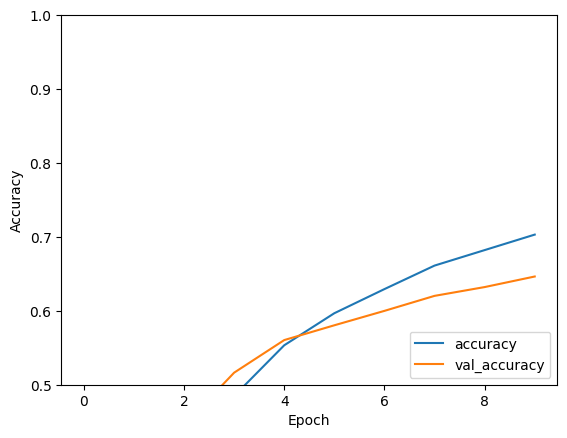

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.646399974822998
